In [0]:
import os
from Audio_reader import readtf
from getman import getmanlist
import gc
import numpy as np
import pandas as pd
import pickle
from keras.layers import Dense, Input, Dropout,Flatten,MaxPooling1D,SpatialDropout2D,SpatialDropout1D
from keras.layers import Conv1D, MaxPooling2D,BatchNormalization,Conv2D
from keras.models import Model
from keras.models import Sequential
from keras import optimizers
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras import regularizers
from sklearn.metrics import confusion_matrix

In [0]:
def check(y):
    if 74 in y:
        return 0 
    #male
    if 1 in y:
        return 1
    #female
    if 2 in y:
        return 2
    #child
    if 3 in y:
        return 3
    return 0

In [0]:
X = []
Y = [] 
with open("X_list_eval.pickle","rb") as xf:
    X.extend(pickle.load(xf))
with open("Y_list_eval.pickle","rb") as xf:
    Y.extend(pickle.load(xf))
      
with open("X_list.pickle","rb") as xf:
    X.extend(pickle.load(xf))
with open("Y_list.pickle","rb") as xf:
    Y.extend(pickle.load(xf))

X=np.array(X)
X=np.reshape(X,(X.shape[0],X.shape[1],X.shape[2]))

Y=np.array(Y)  

X = X.astype('float32')    
X /= 255



In [7]:
Y.shape

(633, 3)

In [0]:
learning_rate=0.001
decay=0.000001
momentum=0.99
dropout_rate = 0.2

rglrzr = regularizers.l2(0.002)

In [49]:
model = Sequential()
model.add(Conv1D(64, 3, padding='same',activation='relu',input_shape=X.shape[1:]))
model.add(BatchNormalization())
model.add(Conv1D(64, 3, padding='same',activation='relu',input_shape=X.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(rate=dropout_rate))
model.add(SpatialDropout1D(rate=dropout_rate))

model.add(Conv1D(128, 3, padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(Conv1D(128, 3, padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(Dropout(rate=dropout_rate))
model.add(SpatialDropout1D(rate=dropout_rate))


model.add(Conv1D(256, 3, padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(Conv1D(256, 3, padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(Conv1D(256, 1, padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(rate=dropout_rate))
model.add(SpatialDropout1D(rate=dropout_rate))

model.add(Conv1D(512, 3, padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(Conv1D(512, 3, padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(Conv1D(512, 1, padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(Dropout(rate=dropout_rate))
model.add(SpatialDropout1D(rate=dropout_rate))


model.add(Conv1D(512, 3, padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(Conv1D(512, 3, padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(Conv1D(512, 1, padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(rate=dropout_rate))
model.add(SpatialDropout1D(rate=dropout_rate))



model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_118 (Conv1D)          (None, 10, 64)            24640     
_________________________________________________________________
batch_normalization_118 (Bat (None, 10, 64)            256       
_________________________________________________________________
conv1d_119 (Conv1D)          (None, 10, 64)            12352     
_________________________________________________________________
batch_normalization_119 (Bat (None, 10, 64)            256       
_________________________________________________________________
max_pooling1d_28 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
dropout_46 (Dropout)         (None, 5, 64)             0         
_________________________________________________________________
spatial_dropout1d_26 (Spatia (None, 5, 64)             0         
__________

In [0]:

optimizer = optimizers.SGD(lr=learning_rate,momentum=momentum,decay=decay)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])

In [0]:
cb=[]

#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, verbose=0, mode='auto')
early_stopping = EarlyStopping(monitor='acc', min_delta=0, patience=30, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

#cb.append(reduce_lr)
cb.append(early_stopping)

In [52]:
history=model.fit(X, Y,
          batch_size=32,
          epochs=50,
          verbose=2,
          callbacks=cb,
          validation_split=0.2,
          shuffle=True)

Train on 506 samples, validate on 127 samples
Epoch 1/50
 - 13s - loss: 1.5644 - acc: 0.4684 - val_loss: 10.6275 - val_acc: 0.2362
Epoch 2/50
 - 1s - loss: 1.4738 - acc: 0.5217 - val_loss: 7.7229 - val_acc: 0.5197
Epoch 3/50
 - 1s - loss: 1.1150 - acc: 0.5534 - val_loss: 7.7421 - val_acc: 0.5197
Epoch 4/50
 - 1s - loss: 0.8684 - acc: 0.6186 - val_loss: 7.7423 - val_acc: 0.5197
Epoch 5/50
 - 1s - loss: 0.8233 - acc: 0.5968 - val_loss: 7.7426 - val_acc: 0.5197
Epoch 6/50
 - 1s - loss: 0.7569 - acc: 0.6364 - val_loss: 7.7428 - val_acc: 0.5197
Epoch 7/50
 - 1s - loss: 0.7478 - acc: 0.6640 - val_loss: 7.7431 - val_acc: 0.5197
Epoch 8/50
 - 1s - loss: 0.7262 - acc: 0.6957 - val_loss: 7.7434 - val_acc: 0.5197
Epoch 9/50
 - 1s - loss: 0.6859 - acc: 0.6779 - val_loss: 7.7352 - val_acc: 0.5197
Epoch 10/50
 - 1s - loss: 0.6903 - acc: 0.6897 - val_loss: 6.9362 - val_acc: 0.5197
Epoch 11/50
 - 1s - loss: 0.6718 - acc: 0.7115 - val_loss: 6.0815 - val_acc: 0.5354
Epoch 12/50
 - 1s - loss: 0.6417 - ac

In [54]:
history=model.fit(X, Y,
          batch_size=32,
          epochs=1,
          verbose=2,
          callbacks=cb,
          validation_split=0.2)

Train on 506 samples, validate on 127 samples
Epoch 1/1
 - 1s - loss: 0.3617 - acc: 0.8439 - val_loss: 0.8332 - val_acc: 0.7323


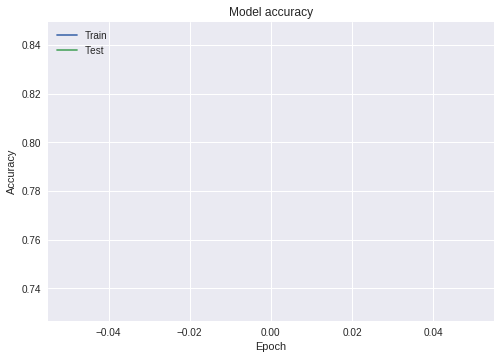

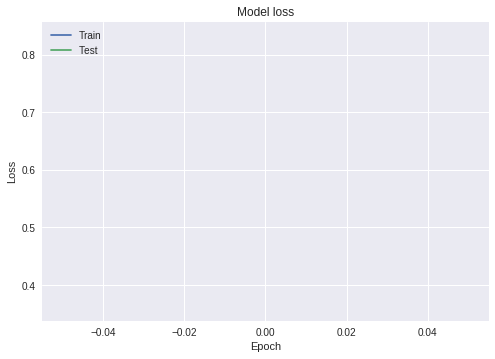

In [55]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
y_pred = model.predict(X)
def maxpos(li):
      if (li[1]>li[0]) and (li[1]>li[2])  :
        return 1
      if (li[2]>li[0]) and (li[2]>li[1])  :
        return 2     
      return 0
y_pre=[maxpos(y) for y in y_pred]
y_tes=[maxpos(y) for y in Y]
confusion_matrix(y_true=y_tes,y_pred=y_pre)

In [0]:
model.save('VGG-ish_conv1-type1.model')